In [62]:
import sympy
from sympy import Integral, Interval, Intersection, symbols, solveset
from sympy import pi as Pi, cos as Cos, tan as Tan
from sympy.plotting import plot


In [63]:
from typing import overload, Callable, Optional, Tuple, Any

from sympy import latex
from sympy.core._print_helpers import Printable
from IPython.display import Latex

# Should be set to 'False' if Google Colab is used.
VS_CODE: bool = True

@overload
def display_with_text(text: Optional[str] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, expression: Optional[Any] = None, *, sep: str = r"\\") -> None:
    ...

@overload
def display_with_text(text: Optional[str] = None, *expressions: Any, sep: str = r"\\") -> None:
    ...

def display_with_text(*args, **kwargs) -> None:
    text: Optional[str] = kwargs.get("text", None)
    expression: Optional[Any] = kwargs.get("expression", None)
    
    sep: str = kwargs.get("sep", r"\\")
    if not isinstance(sep, str):
        raise ValueError(f"Keyword argument 'sep' must be type of <class 'str'> (class str)")

    if text is None and args and args[0] is not None:
        text = str(args[0])
    
    if text is not None and not isinstance(text, str):
        text = str(text)
    
    expressions: Tuple[Any] = args[1:]
    if expression is not None:
        expressions += (expression,)

    if not expressions:
        if text is not None:
            text = "$ \\text{" + text + "} $" if VS_CODE else "\\text{" + text + '}'
            display(Latex(text))
        return
    
    expr_processor: Callable[[Any], str] = \
        lambda expr: str(latex(expr) if isinstance(expr, Printable) else expr)
    final_expression: str = sep.join(map(expr_processor, expressions))
    
    if VS_CODE:
        final_expression = "$ " + final_expression + " $"

    if text is not None:
        final_expression = \
            ("$ \\text{" + text + "} $ " if VS_CODE else "\\text{" + text + "} ") \
            + final_expression

    display(Latex(final_expression))


Построить график зависимости от $x$ площади под графиком функции $\cos t$ на отрезке $[0,x]$ при $x$ из $[\pi/2, \pi]$.
Подписать вертикальную ось $S(x)$.

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

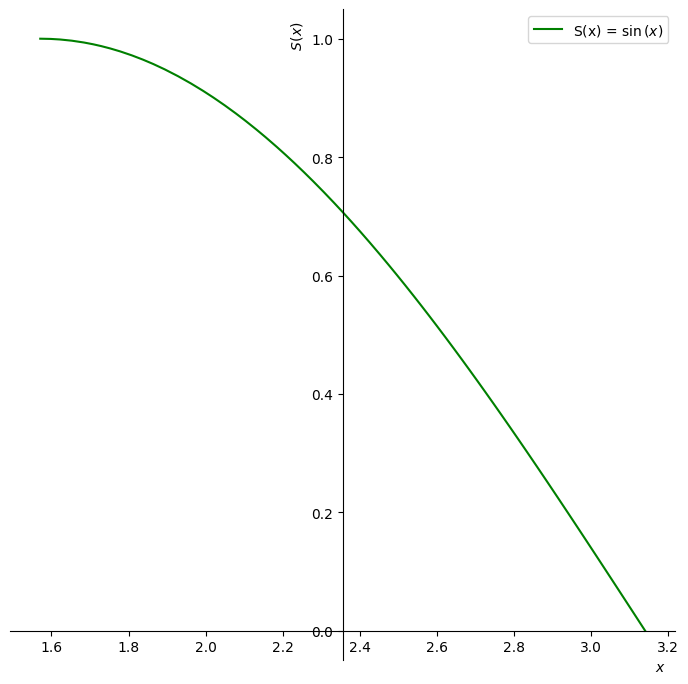

In [64]:
x, t = symbols("x t", positive=True, real=True)

f_t = Cos(t)
S_t = Integral(f_t, (t, 0, x))
display_with_text("Площадь под графиком на отрезке [0, x] - интергал", S_t)
S_x = S_t.doit()
display_with_text("Функция зависимость значения площади от x:", S_x)

ylabel_margin = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"
xlabel_margin = "\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t"

plot(
    S_x,
    (x, Pi/2, Pi),
    line_color='g',
    ylabel=ylabel_margin+"$S(x)$",
    xlabel=xlabel_margin+"$x$",
    label="S(x) = " + latex(S_x, mode='inline'),
    legend=True,
    show=False,
    size=(7, 7)
).show()

Найти решения уравнения $2{\rm tg}^2(x) - 3{\rm tg}(x) - 5 = 0$ на открытом интервале $(-5\pi/4, 11\pi/4)$

In [65]:
from sympy.abc import x

expr = 2*Tan(x)**2 - 3*Tan(x) - 5
interval = Interval.open(-5*Pi/4, 11*Pi/4)

solveset(expr, x, domain=sympy.S.Reals)
roots = Intersection(solveset(expr, x), interval)
display_with_text(f"Решения на открытом интервале", interval, roots)

<IPython.core.display.Latex object>